# Ejercicio 3: Representación Gráfica de Vectores de Documentos y Consultas

## Objetivo de la práctica
- Comprender la representación de documentos y consultas en el modelo de espacio vectorial, mediante el cálculo de matrices término-documento usando medidas como TF y TF-IDF.
- Aplicar la similitud coseno para comparar documentos con consultas, y utilizarla para recuperar y ordenar documentos según su relevancia.
- Visualizar de forma intuitiva los vectores de documentos y consultas, mediante reducción de dimensionalidad y representación gráfica en el plano, para facilitar la interpretación geométrica de la recuperación de información.

## Parte 1: Construcción de la matriz término-documento y TF-IDF

### Actividad
1. Usa el siguiente corpus de 4 documentos.
2. Vectoriza los documentos usando:
   - Frecuencia absoluta (TF)
   - TF-IDF
3. Visualiza los documentos como un gráfico de dispersión 2D y 3D.

In [18]:
%pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 26.3 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 29.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]

[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [21]:
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

documents = [
    "El gato se escondió debajo de la cama.",
    "La cama estaba limpia y cómoda.",
    "El perro y el gato jugaron en el jardín.",
    "La limpieza del jardín es importante."
]

query = "gato"

REPLACEMENTS = (
    ("á", "a"),
    ("é", "e"),
    ("í", "i"),
    ("ó", "o"),
    ("ú", "u"),
    (".", ""),
    (",", ""),
)

documents.append(query)

def replace_punctuation(word: str) -> str:
    for a, b in REPLACEMENTS:
        word = word.replace(a, b).replace(a.upper(), b.upper())
    return word

# Representación TF
terms = []
term_frequencies = {}
doc_index = 0

for doc in documents:
    words = doc.strip().split()
    doc_index += 1
    
    # Initialize frequency dictionary for the current document
    term_frequencies[doc_index] = defaultdict(int)
    
    for word in words:
        word = word.lower()
        word = replace_punctuation(word)
        
        if word not in terms:
            terms.append(word)
        
        term_frequencies[doc_index][word] += 1

matrix = pd.DataFrame(index=sorted(terms))
for doc, frequencies in term_frequencies.items():
    matrix[doc] = [frequencies.get(term, 0) for term in sorted(terms)]


N = len(term_frequencies)
dft = (matrix > 0).sum(axis=1)
matrix["idtf"] = np.log(N / dft)

print(matrix)



# Reducción PCA y visualización 3D

            1  2  3  4  5      idtf
cama        1  1  0  0  0  0.916291
comoda      0  1  0  0  0  1.609438
de          1  0  0  0  0  1.609438
debajo      1  0  0  0  0  1.609438
del         0  0  0  1  0  1.609438
el          1  0  3  0  0  0.916291
en          0  0  1  0  0  1.609438
es          0  0  0  1  0  1.609438
escondio    1  0  0  0  0  1.609438
estaba      0  1  0  0  0  1.609438
gato        1  0  1  0  1  0.510826
importante  0  0  0  1  0  1.609438
jardin      0  0  1  1  0  0.916291
jugaron     0  0  1  0  0  1.609438
la          1  1  0  1  0  0.510826
limpia      0  1  0  0  0  1.609438
limpieza    0  0  0  1  0  1.609438
perro       0  0  1  0  0  1.609438
se          1  0  0  0  0  1.609438
y           0  1  1  0  0  0.916291


In [22]:
# Representación TF-IDF

# Ensure all document columns are of type float
for doc in term_frequencies.keys():
    matrix[doc] = matrix[doc].astype(float)

# Perform the TF-IDF multiplication
for doc, frequencies in term_frequencies.items():
    for term in frequencies:
        matrix.loc[term, doc] *= matrix.loc[term, "idtf"]

print(matrix)

                   1         2         3         4         5      idtf
cama        0.916291  0.916291  0.000000  0.000000  0.000000  0.916291
comoda      0.000000  1.609438  0.000000  0.000000  0.000000  1.609438
de          1.609438  0.000000  0.000000  0.000000  0.000000  1.609438
debajo      1.609438  0.000000  0.000000  0.000000  0.000000  1.609438
del         0.000000  0.000000  0.000000  1.609438  0.000000  1.609438
el          0.916291  0.000000  2.748872  0.000000  0.000000  0.916291
en          0.000000  0.000000  1.609438  0.000000  0.000000  1.609438
es          0.000000  0.000000  0.000000  1.609438  0.000000  1.609438
escondio    1.609438  0.000000  0.000000  0.000000  0.000000  1.609438
estaba      0.000000  1.609438  0.000000  0.000000  0.000000  1.609438
gato        0.510826  0.000000  0.510826  0.000000  0.510826  0.510826
importante  0.000000  0.000000  0.000000  1.609438  0.000000  1.609438
jardin      0.000000  0.000000  0.916291  0.916291  0.000000  0.916291
jugaro

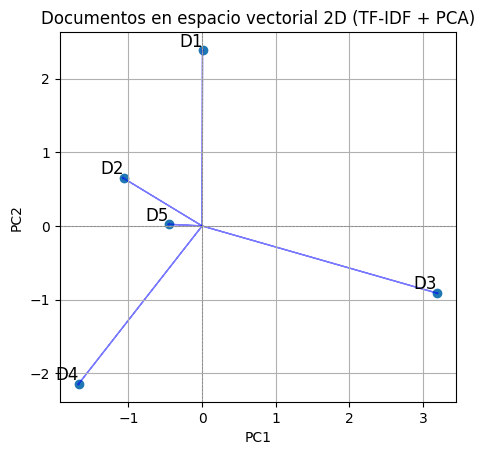

In [24]:
# Reducción PCA y visualización 2D

matrix = matrix.drop('idtf', axis=1)

pca = PCA(n_components=2)
docs_2d = pca.fit_transform(matrix.T)

plt.scatter(docs_2d[:,0], docs_2d[:,1])
for i, (x, y) in enumerate(docs_2d):
    # plt.annotate(txt, (docs_2d[i,0], docs_2d[i,1]))
    plt.arrow(0, 0, x, y, head_width=0.02, head_length=0.02, fc='blue', ec='blue', alpha=0.5)
    plt.text(x, y, f"D{i+1}", fontsize=12, ha='right', va='bottom')


plt.title("Documentos en espacio vectorial 2D (TF-IDF + PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', lw=0.5, ls='--')
plt.axvline(0, color='gray', lw=0.5, ls='--')
plt.grid()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Parte 2: Representación de la consulta como vector

### Actividad
1. Ingresa una consulta como texto.
2. Representa la consulta en el mismo espacio vectorial que los documentos.
3. Calcula similitud coseno entre la consulta y cada documento.
4. Visualiza la consulta como un vector en el mismo espacio vectorial que los documentos.

## Parte 3: Consulta por similitud y ranking de documentos

### Actividad
1. Con la misma representación de vectores, implementar una función que devuelva los documentos más relevantes a una consulta usando similitud coseno.
2. Dibuja los vectores (de documentos y de consulta) como flechas desde el origen usando `plt.quiver()` o `plt.arrow()`